In [26]:
%matplotlib notebook

# Dependencies
import gmaps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Save file path to variable
metrotransit_csv = "TransitStopsBoardingsAndAlightings2019.csv"

# Read with Pandas
metrotransit_df = pd.read_csv(metrotransit_csv)
metrotransit_df.head()

# Define variables
# lat = 
# lng = 
# ons = str(metrotransit_df["Ons"])
# # offs = 
# print(ons)

,Provider,Route Type,Route Classification,Route,Dir,Site_id,Geo_Node_Name,Group ID,latitude,longitude,...,City,Trips,Obs Trips,Schedule,Ons,Offs,Seq,%Sampled,Downtown,Comment
0,Metro Transit,Urban Local,Core Local,2,East,51581.0,HENNEPIN AVE & FRANKLIN AVE / 22ND ST,NaN,44.961886,-93.292079,...,MINNEAPOLIS,92.0,92.0,Weekday,75,8.0,1.0,100%,N,NaN
1,Metro Transit,Urban Local,Core Local,2,East,1099.0,HENNEPIN AVE S & 22ND ST W,NaN,44.961030,-93.292777,...,MINNEAPOLIS,92.0,92.0,Weekday,33,2.0,2.0,100%,N,NaN
2,Metro Transit,Urban Local,Core Local,2,East,13340.0,DUPONT AVE & FRANKLIN AVE W,NaN,44.962534,-93.293016,...,MINNEAPOLIS,92.0,92.0,Weekday,17,1.0,3.0,100%,N,NaN
3,Metro Transit,Urban Local,Core Local,2,East,13337.0,FRANKLIN AVE W & HENNEPIN AVE S,NaN,44.962630,-93.291123,...,MINNEAPOLIS,92.0,92.0,Weekday,177,2.0,4.0,100%,N,NaN
4,Metro Transit,Urban Local,Core Local,2,East,56705.0,FRANKLIN AVE W & LYNDALE AVE S,NaN,44.962642,-93.287697,...,MINNEAPOLIS,92.0,92.0,Weekday,143,4.0,5.0,100%,N,NaN


In [2]:
Route_df = metrotransit_df.groupby("Route Type")
Route_df.count()

,Provider,Route Classification,Route,Dir,Site_id,Geo_Node_Name,Group ID,latitude,longitude,x-coordinate,...,City,Trips,Obs Trips,Schedule,Ons,Offs,Seq,%Sampled,Downtown,Comment
Route Type,,,,,,,,,,,,,,,,,,,,,
Express,7546,7546,7546,7532,7546,7546,93,7546,7546,7546,...,7546,7546,5795,7546,5809,5795,7546,6698,7546,38
Suburban Local,8321,8321,8321,8321,8321,8321,228,8321,8321,8321,...,8321,8321,6373,8321,6373,6373,8321,8279,8321,71
Urban Local,23252,23252,23252,23126,23252,23252,348,23252,23252,23252,...,23252,23252,23093,23252,23093,22967,23252,23252,23252,292


In [3]:
schedule_df = metrotransit_df.groupby("Schedule")
schedule_df.count()

,Provider,Route Type,Route Classification,Route,Dir,Site_id,Geo_Node_Name,Group ID,latitude,longitude,...,y-coordinate,City,Trips,Obs Trips,Ons,Offs,Seq,%Sampled,Downtown,Comment
Schedule,,,,,,,,,,,,,,,,,,,,,
Saturday,9313,9313,9313,9313,9271,9313,9313,175,9313,9313,...,9313,9313,9313,8923,8923,8881,9313,9313,9313,100
Sunday,7496,7496,7496,7496,7454,7496,7496,152,7496,7496,...,7496,7496,7496,7106,7106,7064,7496,7496,7496,73
Weekday,22303,22303,22303,22303,22254,22303,22303,341,22303,22303,...,22303,22303,22303,19232,19239,19190,22303,21413,22303,228
Weekend,7,7,7,7,0,7,7,1,7,7,...,7,7,7,0,7,0,7,7,7,0


In [27]:
core_local_df=metrotransit_df.loc[metrotransit_df["Route Classification"]=="Core Local"]
core_local_df.head()

,Provider,Route Type,Route Classification,Route,Dir,Site_id,Geo_Node_Name,Group ID,latitude,longitude,...,City,Trips,Obs Trips,Schedule,Ons,Offs,Seq,%Sampled,Downtown,Comment
0,Metro Transit,Urban Local,Core Local,2,East,51581.0,HENNEPIN AVE & FRANKLIN AVE / 22ND ST,NaN,44.961886,-93.292079,...,MINNEAPOLIS,92.0,92.0,Weekday,75,8.0,1.0,100%,N,NaN
1,Metro Transit,Urban Local,Core Local,2,East,1099.0,HENNEPIN AVE S & 22ND ST W,NaN,44.961030,-93.292777,...,MINNEAPOLIS,92.0,92.0,Weekday,33,2.0,2.0,100%,N,NaN
2,Metro Transit,Urban Local,Core Local,2,East,13340.0,DUPONT AVE & FRANKLIN AVE W,NaN,44.962534,-93.293016,...,MINNEAPOLIS,92.0,92.0,Weekday,17,1.0,3.0,100%,N,NaN
3,Metro Transit,Urban Local,Core Local,2,East,13337.0,FRANKLIN AVE W & HENNEPIN AVE S,NaN,44.962630,-93.291123,...,MINNEAPOLIS,92.0,92.0,Weekday,177,2.0,4.0,100%,N,NaN
4,Metro Transit,Urban Local,Core Local,2,East,56705.0,FRANKLIN AVE W & LYNDALE AVE S,NaN,44.962642,-93.287697,...,MINNEAPOLIS,92.0,92.0,Weekday,143,4.0,5.0,100%,N,NaN


<IPython.core.display.Javascript object>


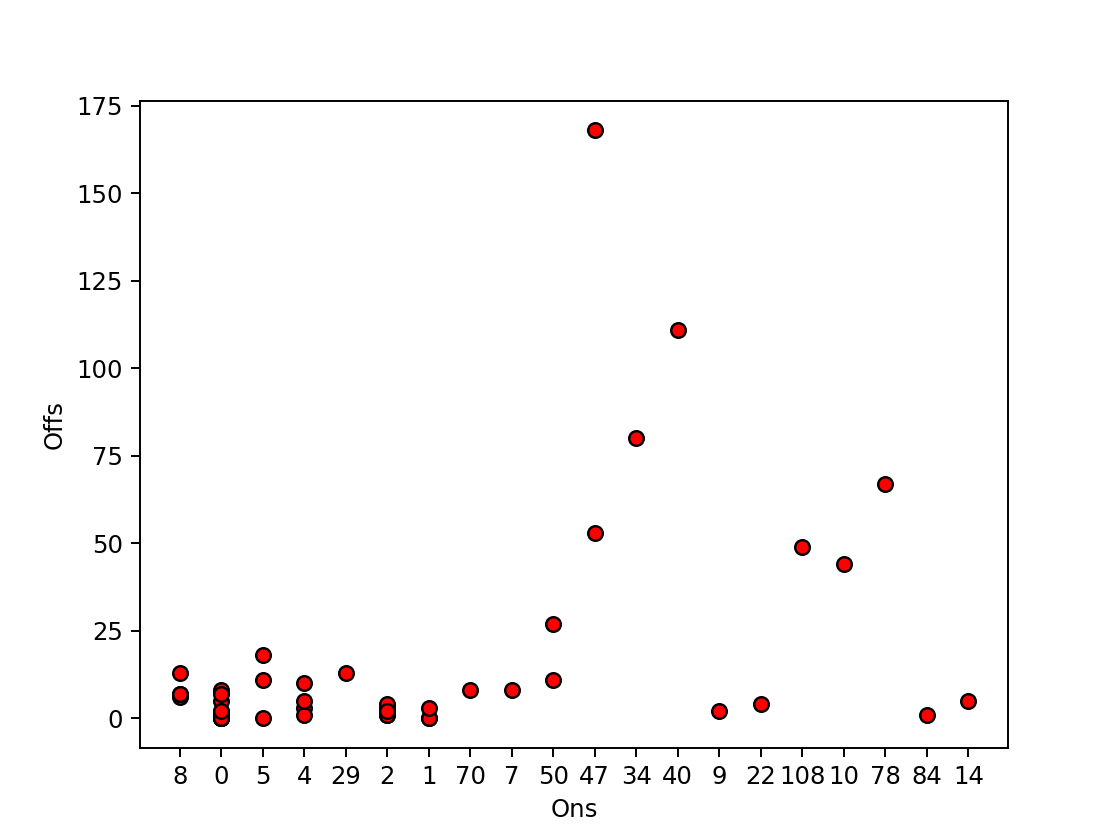

Text(0, 0.5, 'Offs')

In [5]:
sample_core_local_df = core_local_df.sample(n = 50)

ons = sample_core_local_df["Ons"]
offs = sample_core_local_df["Offs"]

plt.scatter(ons, offs, marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Ons")
plt.ylabel("Offs")


In [32]:
# Store latitude and longitude in locations
locations = core_local_df[["latitude", "longitude"]].astype(float)

# Fill NaN values and convert to float
volume = core_local_df["Ons"].astype(float)

core_local_df = core_local_df.dropna()

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=volume, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))